In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv("Mall_Customers.csv")

In [20]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [22]:
df1.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

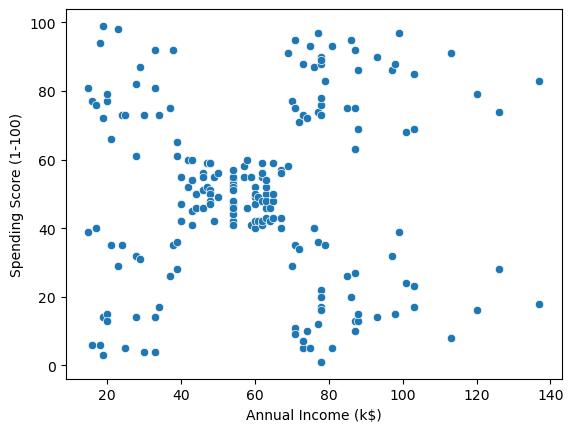

In [23]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)")

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1.iloc[:]=scaler.fit_transform(df1.iloc[:])
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [25]:
# hyperparameter tuning for finding number of clusters,
# with the help elbow method
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
wcss   

[400.0,
 273.66888662642015,
 229.9569284667433,
 109.22822707921347,
 65.56840815571681,
 57.381747460227864,
 46.91711742566163,
 45.069788144132914,
 34.7179473252373,
 29.076176851244274]

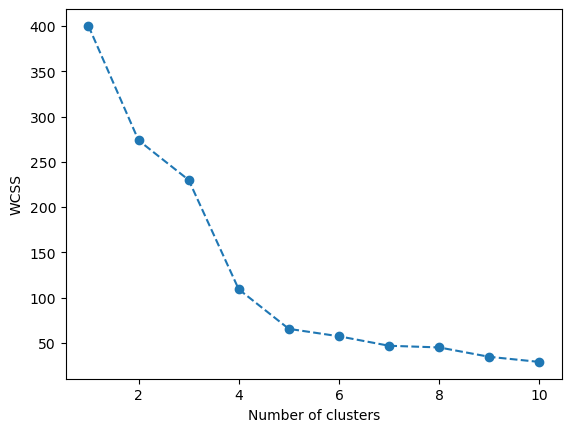

In [26]:
plt.plot(range(1,11),wcss,"o--")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df1)
df["target"]=kmeans.predict(df1)
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [28]:
df["target"].value_counts()

target
4    81
2    39
1    35
3    23
0    22
Name: count, dtype: int64

In [29]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617]])

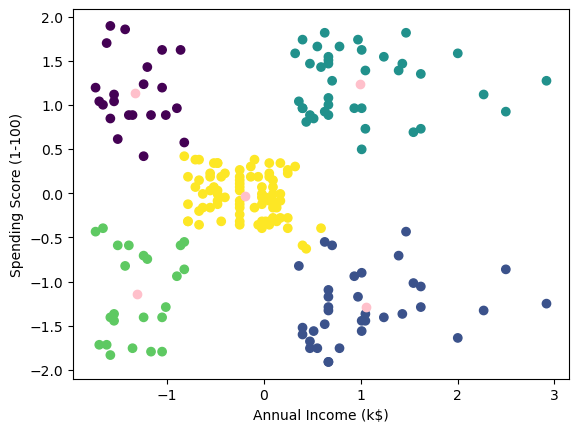

In [32]:
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c=df["target"])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="pink")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()